---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Importing Libraries**](#Section32)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Description of the Dataset(s)**](#Section5)<br>
  5.1 [**Dataset Description**](#Section51)<br>
  5.2 [**Dataset Information**](#Section52)<br>
6. [**Data Pre-Processing**](#Section6)<br>
  6.1 [**Common Functions**](#Section61)</br>
7. [**Exploratory Data Analysis**](#Section7)<br>
  7.1 [**Distribution of Employees in various Departments**](#Section71)</br>
  7.2 [**Distribution of Employees Salary Category**](#Section72)</br>
  7.3 [**Distribution of Employees Status**](#Section73)</br>
  7.4 [**Distribution of Employees who filed Complaint**](#Section74)</br>
  7.5 [**Distribution of Employees Promtion Status in last 3 years**](#Section75)</br>
  7.6 [**Distribution of Employees association with the Organization in Years**](#Section76)</br>
8. [**Post Data Processing & Feature Selection**](#Section8)</br>
  8.1 [**Feature Selection**](#Section81)</br>
  8.2 [**Encoding Categorical Features**](#Section82)</br>
  8.3 [**Data Preparation**](#Section83)</br>
9. [**Model Development & Evaluation**](#Section9)</br>
  9.1 [**Logistic Regression - Baseline Model**](#Section91)</br>
  9.2 [**Using Trained Model for Prediction**](#Section92)</br>
  9.3 [**Logistic Regression Model Evaluation**](#Section93)</br>
10. [**Summarization**](#Section10)</br>
  10.1 [**Conclusion**](#Section101)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

  - HR Department of a Software company is looking out to Stop/Minimize the employee(s) leaving the company. 

  - They wanted to build a Machine Learning model which can predict upfront, which might help the Company.  

<p align="center"><img src="https://cdn-images-1.medium.com/max/800/1*GjXBjVrPBcHVI3mebMoPpw.jpeg"></p>

---
<a name = Section2></a>
# **2. Problem Statement**
---
<br>

HR Department of a software company want to supplement their exit interviews with a more proactive approach

* They want to try a new initiative to retain employees(Permanent).
* The idea is to use data to predict whether an employee is likely to leave.
* Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
<br>
<br>

**Current Practice**
<br>
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

<br>

This suffers from the following problems:

* This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
* The second problem is these insights can't be aggregated and interlaced across all employees who have left.
* The third is that, it is too late by the time the proposed policy changes take effect.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [2]:
# Installing mysql-connector for connecting and getting the required datasets from mysql database
!pip install mysql-connector

     |████████████████████████████████| 11.9 MB 8.6 MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=a6ebf3ea3543dd6927a5b3fecc4be3bdbed810aaa6283bccf6d15927b30e5ab7
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql-connector


<a id = Section32></a>
### **3.2 Importing Libraries**

In [3]:
import pandas as pd                                                 # Importing for panel data analysis
import numpy as np
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)

pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.6f' % x)         # To suppress scientific notation over exponential values

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.pipeline import make_pipeline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

In [ ]:
# Code to import mysql.connector and connect to mysql source and get relevant table data 

import mysql.connector

conn = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone2')

department_data_query = "SELECT * FROM department_data;"
employee_details_data_query = "SELECT * FROM employee_details_data;"
employee_data_query = "SELECT * FROM employee_data;"
Department_Data = pd.read_sql(department_data_query, conn)
Employee_Details_Data = pd.read_sql(employee_details_data_query, conn)
Employee_Data = pd.read_sql(employee_data_query, conn)

conn.close()

In [ ]:
# save the datasets to google drive for accessing them next time

Department_Data.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/department_data.csv', index=False)
Employee_Details_Data.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/employee_details_data.csv', index=False)
Employee_Data.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/employee_data.csv', index=False)

In [8]:
# Fetch the relevant datasets directly from google drive

Department_Data = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/department_data.csv')
Employee_Details_Data = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/employee_details_data.csv')
Employee_Data = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/employee_data.csv')

In [9]:
Department_Data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [10]:
Employee_Details_Data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [11]:
Employee_Data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.000000,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.000000,124467
1,134.000000,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.000000,112210
2,156.000000,D00-SS,1.000000,0.474082,2,NaN,medium,0.405101,Left,3.000000,126150
3,256.000000,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.000000,125346
4,146.000000,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.000000,113707


---
<a name = Section5></a>
# **5. Description of the Dataset(s)**
---

* This 3 datasets provides the details that contain information about past employees and their status (still employed or already left).

**department_data**

* Total of **11 deparments** available in the given dataset

|Id|Feature|Description|
|:--|:--|:--|
|01|dept_id| Unique Department Code| 
|02|dept_name| Name of the Department| 
|03|dept_head| Name of the Head of the Department| 

**employee_details_data**

* Total of **14245 employee details** available in the given dataset

|Id|Feature|Description|
|:--|:--|:--|
|01|employee_id| Unique ID Number for each employee| 
|02|age| Age of the employee| 
|03|gender| Gender of the employee|
|04|marital_status| Marital Status of the employee|

**employee_data**

* Total of **14150 employee data** available in the given dataset 

|Id|Feature|Description|
|:--|:--|:--|
|01|department| Department to which the employees belong(ed) to| 
|02|salary| Salary level with respect to rest of their department| 
|03|tenure| Number of years at the company|
|04|recently_promoted| Was the employee promoted in the last 3 years?|
|05|employee_id| Unique ID Number for each employee|
|06|n_projects| Number of projects employee has worked on|
|07|avg_monthly_hrs| Average number of hours worked per month|
|08|satisfaction| Score for employee’s satisfaction with the company (higher is better)|
|09|last_evaluation| Score for most recent evaluation of employee (higher is better)|
|10|filed_complaint| Has the employee filed a formal complaint in the last 3 years?|

<a id = Section51></a>
### **5.1 Dataset(s) Description**

In [12]:
Department_Data.describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1


In [13]:
Employee_Details_Data.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [14]:
Employee_Data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.000000,12663.000000,14150.000000,297.000000,14000.000000,14000.000000,14150.000000
mean,199.994346,1.000000,0.718399,3.778304,1.000000,0.621212,3.499357,112080.750247
std,50.833697,0.000000,0.173108,1.250162,0.000000,0.250482,1.462584,8748.202856
min,49.000000,1.000000,0.316175,1.000000,1.000000,0.040058,2.000000,0.000000
25%,155.000000,1.000000,0.563711,3.000000,1.000000,0.450356,3.000000,105772.500000
50%,199.000000,1.000000,0.724731,4.000000,1.000000,0.652394,3.000000,111291.500000
75%,245.000000,1.000000,0.871409,5.000000,1.000000,0.824925,4.000000,116650.750000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000


<a id = Section52></a>
### **5.2 Dataset Information**

In [15]:
Department_Data.info(verbose='True', memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 2.2 KB


In [16]:
Employee_Details_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [17]:
Employee_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


**Observations**

  - No Null values exist in **department_data** & **employee_details_data** datasets

  - **employee_data** dataset has Null/missing values

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.

**1. department_data**

In [18]:
Department_Data.head(15)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [19]:
# To find, if there are any duplicate entries in the dataset

Department_Data[Department_Data.duplicated()]

,dept_id,dept_name,dept_head


**Observations**

  - **No Null / duplicate** values exist in the dataset
  - **Temporary** department exists

**2. employee_details_data**

In [20]:
Employee_Details_Data.tail()

,employee_id,age,gender,marital_status
14240,111781,26,Male,Unmarried
14241,100372,35,Male,Married
14242,128083,30,Female,Married
14243,118487,24,Male,Unmarried
14244,118849,39,Male,Married


In [21]:
Employee_Details_Data[Employee_Details_Data.duplicated()]

,employee_id,age,gender,marital_status


In [22]:
Employee_Details_Data['employee_id'].nunique()

14245

In [23]:
Employee_Details_Data['age'].nunique()

36

In [24]:
Employee_Details_Data['age'].sort_values().unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57])

In [25]:
print(Employee_Details_Data['gender'].nunique())
print(Employee_Details_Data['gender'].unique())

2
['Male' 'Female']


In [26]:
print(Employee_Details_Data['marital_status'].nunique())
print(Employee_Details_Data['marital_status'].unique())

2
['Married' 'Unmarried']


In [ ]:
# To check if there are any employee id's missing or not available
Employee_Details_Data['employee_id'].sort_values()

**3. employee_data**

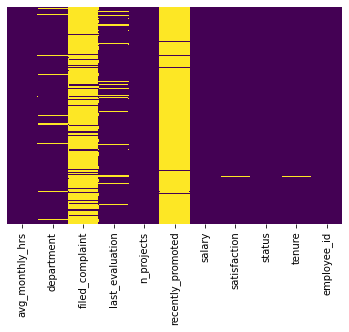

In [27]:
# visually checking the Null/Nan values in the Dataset/Dataframe using heatmap

sns.heatmap(Employee_Data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Observation**

  - **Null** values exist in **department, filed_complaint, last_evaluation, recently_promoted, satisfaction & tenure** columns

In [28]:
# Find how many null values exist in each column

pd.DataFrame(Employee_Data.isnull().sum()).transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,0,707,12104,1487,0,13853,0,150,0,150,0


In [29]:
Employee_Data[Employee_Data.duplicated()].count()

avg_monthly_hrs      29
department           29
filed_complaint       5
last_evaluation      29
n_projects           29
recently_promoted     0
salary               29
satisfaction         29
status               29
tenure               29
employee_id          29
dtype: int64

In [30]:
# To find, if there are any duplicate entries in the dataset

employee_ids = Employee_Data[Employee_Data.duplicated()]['employee_id']
Employee_Data[Employee_Data['employee_id'].isin(employee_ids)].sort_values('employee_id').head(6)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14145,245.000000,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.000000,101809
2400,245.000000,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.000000,101809
7069,133.000000,D00-SS,NaN,0.986741,3,NaN,medium,0.617304,Employed,5.000000,102701
14140,133.000000,D00-SS,NaN,0.986741,3,NaN,medium,0.617304,Employed,5.000000,102701
13596,136.000000,D00-SS,NaN,0.645563,4,NaN,high,0.664039,Employed,3.000000,104360
14135,136.000000,D00-SS,NaN,0.645563,4,NaN,high,0.664039,Employed,3.000000,104360


**Observation**

  - 29 Duplicate entries exist in **employee_data** dataset

**Action**

  - Remove the duplicate entries

In [33]:
DF_PreProcessing(Employee_Data)

In [34]:
# No duplicates

Employee_Data[Employee_Data.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [35]:
# To check if there are any employee id's missing or not available
Employee_Data['employee_id'].sort_values().head(10)

12304         0
11304         0
34            0
1234          0
304           0
9436     100101
10635    100102
10361    100103
5479     100105
4659     100106
Name: employee_id, dtype: int64

In [36]:
Employee_Data[Employee_Data['employee_id'] == 0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.000000,Sales,0,0.852702,6,0,low,0.069168,Left,4,0
304,264.000000,Engineering,0,0.774554,6,0,low,0.110974,Left,4,0
1234,129.000000,Support,0,0.402660,2,0,medium,0.437359,Left,3,0
11304,167.000000,UNKNOWN,0,0.880053,5,0,low,0.682140,Employed,3,0
12304,259.000000,Engineering,0,0.505883,5,0,low,0.631046,Employed,4,0


**Observation**:

  There are 5 records where employee_id is 0. As these are not belonging to Temp employees, we are retaining them for our analysis.

In [37]:
Employee_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13971 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13971 non-null  float64
 1   department         13971 non-null  object 
 2   filed_complaint    13971 non-null  Int64  
 3   last_evaluation    13971 non-null  float64
 4   n_projects         13971 non-null  int64  
 5   recently_promoted  13971 non-null  Int64  
 6   salary             13971 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             13971 non-null  object 
 9   tenure             13971 non-null  Int64  
 10  employee_id        13971 non-null  int64  
dtypes: Int64(3), float64(3), int64(2), object(3)
memory usage: 1.3+ MB


In [38]:
Employee_Data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.000000,UNKNOWN,0,0.866838,6,0,medium,0.134415,Left,4,124467
1,134.000000,UNKNOWN,0,0.555718,2,0,low,0.511041,Left,3,112210
2,156.000000,Sales,1,0.474082,2,0,medium,0.405101,Left,3,126150
3,256.000000,Support,0,0.961360,6,0,low,0.152974,Left,4,125346
4,146.000000,Sales,0,0.507349,2,0,medium,0.434845,Left,3,113707


In [39]:
Employee_Data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,13971.000000,13971.000000,13971.000000,13971.000000,13971.000000,13971.000000,13971.000000,13971.000000
mean,201.078591,0.144013,0.649567,3.800873,0.021258,0.621238,3.497745,112073.338558
std,49.955277,0.351115,0.267851,1.235540,0.144249,0.250502,1.460202,8747.133201
min,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,2.000000,0.000000
25%,156.000000,0.000000,0.525684,3.000000,0.000000,0.450314,3.000000,105758.500000
50%,200.000000,0.000000,0.687915,4.000000,0.000000,0.652517,3.000000,111289.000000
75%,245.000000,0.000000,0.858146,5.000000,0.000000,0.824800,4.000000,116655.500000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000


In [40]:
Employee_Data['department'].nunique()

11

In [42]:
Employee_Data['department'].sort_values().unique()

array(['Admin', 'Engineering', 'Finance', 'IT', 'Management', 'Marketing',
       'Procurement', 'Product', 'Sales', 'Support', 'UNKNOWN'],
      dtype=object)

**Observation**

  - 'Department' column has value as '-IT'. This has to be renamed as 'D00-IT'
  - 'Department' column has **temporary** employees. This has to be removed. 
  - 'Department' has **null** values.

In [43]:
Employee_Data[Employee_Data['department'] == '-IT'].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [44]:
Employee_Data[(Employee_Data['department'] == 'D00-TP')]['department'].count()

0

In [45]:
Employee_Data[Employee_Data['department'].isnull()].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [46]:
Employee_Data['department'].isnull().sum()

0

**Observation**
  - 'Department' has 707 entries which are not having relevant values. Hence, keeping them as 'Unknown' departments for our analysis.
  - 'Department' has dept_id in it. Adjusting the column to have its relevant department names rather than dept_id.

In [47]:
print(Employee_Data['salary'].nunique())
print(Employee_Data['salary'].unique())

3
['medium' 'low' 'high']


In [48]:
print(Employee_Data['status'].nunique())
print(Employee_Data['status'].unique())

2
['Left' 'Employed']


In [49]:
Employee_Data['avg_monthly_hrs'].nunique()

215

In [50]:
Employee_Data['filed_complaint'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [51]:
Employee_Data['last_evaluation'].nunique()

12189

In [52]:
Employee_Data[Employee_Data['last_evaluation'].isna()].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [53]:
print(Employee_Data['n_projects'].nunique())
print(Employee_Data['n_projects'].unique())

6
[6 2 7 5 4 3]


In [54]:
print(Employee_Data['recently_promoted'].nunique())
print(Employee_Data['recently_promoted'].unique())

2
<IntegerArray>
[0, 1]
Length: 2, dtype: Int64


In [55]:
print(Employee_Data['tenure'].nunique())
print(Employee_Data['tenure'].unique())

8
<IntegerArray>
[4, 3, 5, 6, 2, 10, 7, 8]
Length: 8, dtype: Int64


In [56]:
print(Employee_Data['satisfaction'].nunique())
print(Employee_Data['satisfaction'].unique())

13497
[0.134415 0.511041 0.405101 ... 0.934465 0.906613 0.459371]


In [57]:
Employee_Data[Employee_Data['satisfaction'].isna()].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [58]:
Employee_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13971 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13971 non-null  float64
 1   department         13971 non-null  object 
 2   filed_complaint    13971 non-null  Int64  
 3   last_evaluation    13971 non-null  float64
 4   n_projects         13971 non-null  int64  
 5   recently_promoted  13971 non-null  Int64  
 6   salary             13971 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             13971 non-null  object 
 9   tenure             13971 non-null  Int64  
 10  employee_id        13971 non-null  int64  
dtypes: Int64(3), float64(3), int64(2), object(3)
memory usage: 1.3+ MB


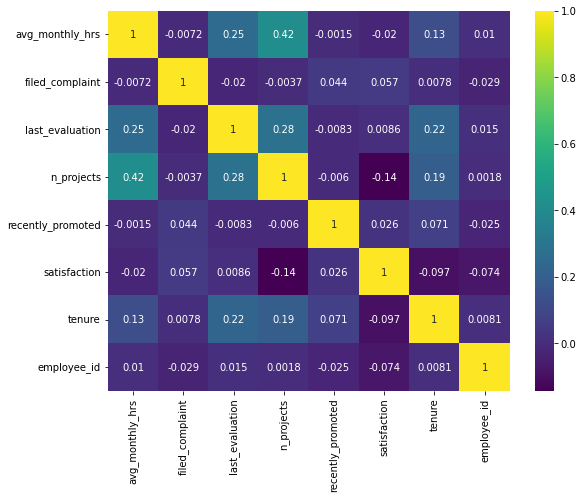

In [59]:
plt.figure(figsize=(9,7)) 
sns.heatmap(Employee_Data.corr(), annot=True, cmap='viridis')

**Observation**
  - There is **weak** correlation between the input variables

In [ ]:
Employee_Data.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/Employee_Data_Corrected.csv', index=False)

In [ ]:
Employee_Data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.000000,UNKNOWN,0,0.866838,6,0,medium,0.134415,Left,4,124467
1,134.000000,UNKNOWN,0,0.555718,2,0,low,0.511041,Left,3,112210
2,156.000000,Sales,1,0.474082,2,0,medium,0.405101,Left,3,126150
3,256.000000,Support,0,0.961360,6,0,low,0.152974,Left,4,125346
4,146.000000,Sales,0,0.507349,2,0,medium,0.434845,Left,3,113707


In [ ]:
Employee_Data = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/Employee_Data_Corrected.csv')

<a id = Section61></a>
### **6.1 Common Functions**

In [ ]:
def DF_PreProcessing(df):

  # Drop duplicate entries from the dataset
  df.drop_duplicates(keep='last', inplace=True)
  
  # Replace the rows which has '-IT' with 'D00-IT'
  df['department'].replace('-IT', 'D00-IT', inplace=True)
  df['department'] = df['department'].map(Department_Data.set_index('dept_id')['dept_name'])
  df['department'].replace(np.nan, 'UNKNOWN', inplace=True)
  # To drop the Temporary department employees
  df.drop(df[(df['department'] == 'Temp')].index, inplace=True)

  df['filed_complaint'].replace(np.nan, 0, inplace=True)
  df['last_evaluation'].replace(np.nan, 0, inplace=True)
  df['recently_promoted'].replace(np.nan, 0, inplace=True)
  df['tenure'].replace(np.nan, 0, inplace=True)

  df['satisfaction'].replace(np.nan, df['satisfaction'].mean(), inplace=True)

  #To convert certain columns who values are supposted to have 0 & 1
  df['filed_complaint'] = df['filed_complaint'].astype('Int64')
  df['recently_promoted'] = df['recently_promoted'].astype('Int64')
  df['tenure'] = df['tenure'].astype('Int64')

---
<a name = Section7></a>
# **7. Exploratory Data Analysis**
---

<a id = Section71></a>
#### **7.1. Distribution of Employees in various Departments**

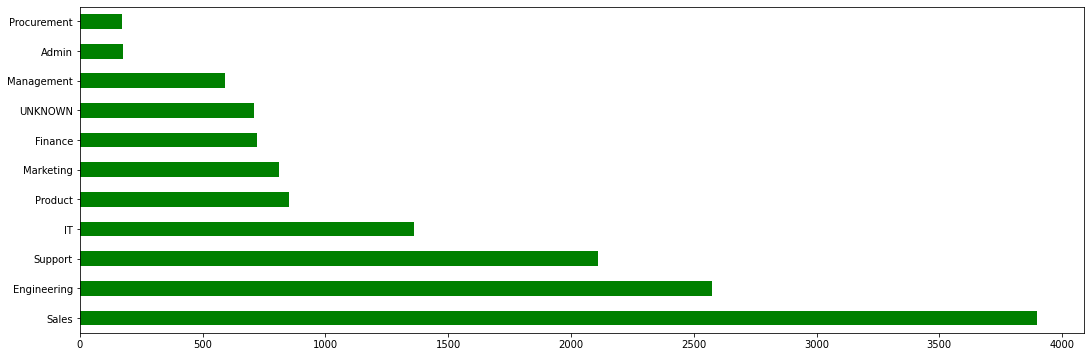

In [60]:
Employee_Data['department'].value_counts().plot(kind='barh', color='Green', figsize=(18,6))

<a id = Section72></a>
#### **7.2. Distribution of Employees Salary Category**

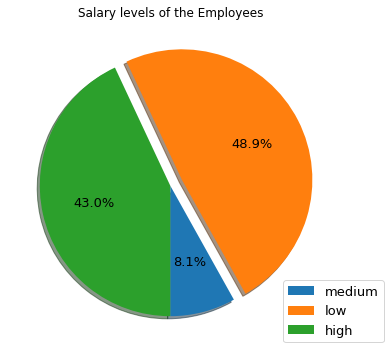

In [61]:
fix, ax = plt.subplots(figsize = (10, 6))
labels = Employee_Data['salary'].unique()

Employee_Data.groupby(['salary'])['employee_id'].nunique().plot.pie(startangle = 270, ax = ax, explode = [0, 0.10, 0], autopct='%1.1f%%', shadow=True, fontsize = 13, labels=['', '', ''])

ax.set_title('Salary levels of the Employees')
ax.set_ylabel(None)
plt.legend(loc='lower center', labels=labels, fontsize= 13, bbox_to_anchor=(1, 0))

plt.show()

<a id = Section73></a>
#### **7.3. Distribution of Employees Status**

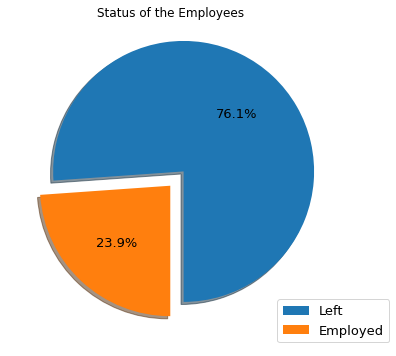

In [62]:
fix, ax = plt.subplots(figsize = (10, 6))
labels = Employee_Data['status'].unique()

Employee_Data.groupby(['status'])['employee_id'].nunique().plot.pie(startangle = 270, ax = ax, explode = [0.15, 0], autopct='%1.1f%%', shadow=True, fontsize = 13, labels=['', ''])

ax.set_title('Status of the Employees')
ax.set_ylabel(None)
plt.legend(loc='lower center', labels=labels, fontsize= 13, bbox_to_anchor=(1, 0))

plt.show()

<a id = Section74></a>
#### **7.4. Distribution of Employees who filed Complaint**

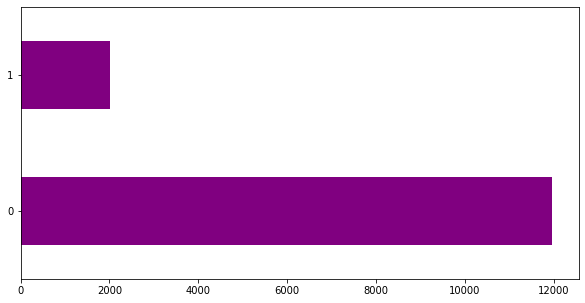

In [63]:
Employee_Data['filed_complaint'].value_counts().plot(kind='barh', color='purple', figsize=(10,5))

<a id = Section75></a>
#### **7.5. Distribution of Employees Promtion Status in last 3 years**

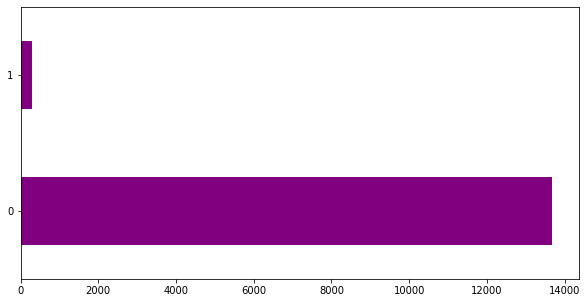

In [64]:
Employee_Data['recently_promoted'].value_counts().plot(kind='barh', color='purple', figsize=(10,5))

<a id = Section76></a>
#### **7.6. Distribution of Employees association with the Organization in Years**

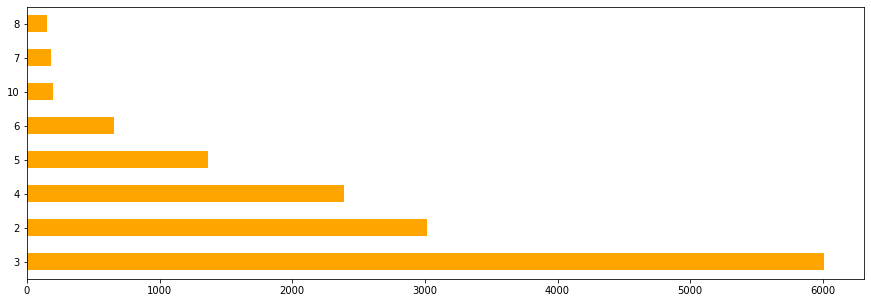

In [65]:
Employee_Data['tenure'].value_counts().plot(kind='barh', color='orange', figsize=(15,5))

---
<a name = Section8></a>
# **8. Post Data Processing & Feature Selection**
---

- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

<a name = Section81></a>
### **8.1 Feature Selection**

- **Visualize  the correlation** of input features **using Heatmap**.
- If there is a High correlation, we will **remove the highly correlated feature**.

Text(0.5, 1.0, 'Correlation between features')

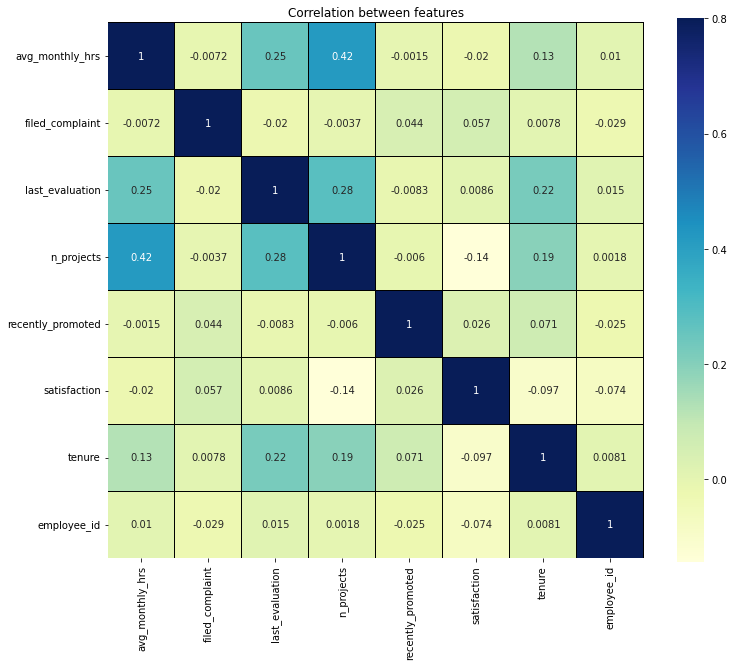

In [66]:
corr = Employee_Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,vmax=.8, linewidth=.01, square = True, annot = True, cmap='YlGnBu', linecolor ='black')
plt.title('Correlation between features')

**Observation**
  - There is **weak** correlation between the numeric variables in the merged dataset

<a name = Section82></a>
### **8.2 Encoding Categorical Features**

In [67]:
Employee_Data['status'] = Employee_Data['status'].map({'Employed':0, 'Left':1})

In [68]:
Employee_Data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.000000,UNKNOWN,0,0.866838,6,0,medium,0.134415,1,4,124467
1,134.000000,UNKNOWN,0,0.555718,2,0,low,0.511041,1,3,112210
2,156.000000,Sales,1,0.474082,2,0,medium,0.405101,1,3,126150
3,256.000000,Support,0,0.961360,6,0,low,0.152974,1,4,125346
4,146.000000,Sales,0,0.507349,2,0,medium,0.434845,1,3,113707


In [69]:
Employee_Data.dtypes

avg_monthly_hrs      float64
department            object
filed_complaint        Int64
last_evaluation      float64
n_projects             int64
recently_promoted      Int64
salary                object
satisfaction         float64
status                 int64
tenure                 Int64
employee_id            int64
dtype: object

All Categorical feature(s) to be encoded via **One Hot Encoding**

In [70]:
Encoded_Employee_Data = pd.get_dummies(Employee_Data, columns = ['department', 'salary'], drop_first=True)
Encoded_Employee_Data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,department_Engineering,department_Finance,department_IT,department_Management,department_Marketing,department_Procurement,department_Product,department_Sales,department_Support,department_UNKNOWN,salary_low,salary_medium
0,246.000000,0,0.866838,6,0,0.134415,1,4,124467,0,0,0,0,0,0,0,0,0,1,0,1
1,134.000000,0,0.555718,2,0,0.511041,1,3,112210,0,0,0,0,0,0,0,0,0,1,1,0
2,156.000000,1,0.474082,2,0,0.405101,1,3,126150,0,0,0,0,0,0,0,1,0,0,0,1
3,256.000000,0,0.961360,6,0,0.152974,1,4,125346,0,0,0,0,0,0,0,0,1,0,1,0
4,146.000000,0,0.507349,2,0,0.434845,1,3,113707,0,0,0,0,0,0,0,1,0,0,0,1


<a name = Section83></a>
### **8.3 Data Preparation**

- We will **split** our **data** into **training** and **testing** part for further development.

In [71]:
X = Encoded_Employee_Data.drop(['employee_id','status'], axis = 1)
y = Encoded_Employee_Data['status']

In [72]:
X.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_Engineering,department_Finance,department_IT,department_Management,department_Marketing,department_Procurement,department_Product,department_Sales,department_Support,department_UNKNOWN,salary_low,salary_medium
0,246.000000,0,0.866838,6,0,0.134415,4,0,0,0,0,0,0,0,0,0,1,0,1
1,134.000000,0,0.555718,2,0,0.511041,3,0,0,0,0,0,0,0,0,0,1,1,0
2,156.000000,1,0.474082,2,0,0.405101,3,0,0,0,0,0,0,0,1,0,0,0,1
3,256.000000,0,0.961360,6,0,0.152974,4,0,0,0,0,0,0,0,0,1,0,1,0
4,146.000000,0,0.507349,2,0,0.434845,3,0,0,0,0,0,0,0,1,0,0,0,1


In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3225, test_size=0.10)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (12573, 19) (12573,)
Testing Data Shape: (1398, 19) (1398,)


<a name = Section9></a>

---
# **9. Model Development & Evaluation**
---

- We will **develop Logistic Regression using input features** and **tune** our **model if required**.

- We will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose**, we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.


<a name = Section91></a>

## **9.1 Baseline Models development**

In [75]:
pipelines = {
  'LogReg' : make_pipeline(StandardScaler(), LogisticRegression(random_state=3225)),
  'RandForest' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=3225)),
  'GradBoost'  : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=3225))
}

In [76]:
LogReg_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 
                       0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                     }

RandForest_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
    }

GradBoost_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
    }

In [77]:
hyperparameters = {
    'LogReg' : LogReg_hyperparameters,
    'RandForest' : RandForest_hyperparameters,
    'GradBoost' : GradBoost_hyperparameters
    }

In [78]:
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV

models = {}
for name, pipeline in pipelines.items():
  selected_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
  selected_model.fit(X_train, y_train)
  models[name] = selected_model

In [79]:
for name, model in models.items():
  print(name, model.best_score_)

LogReg 0.7886748042440869
RandForest 0.9797980909450796
GradBoost 0.975184499394804


<a name = Section92></a>

## **9.2 Using Trained Models for Prediction**

Results for: LogReg
[[1027   72]
 [ 170  129]]
Accuracy: 0.82689556509299
Precision: 0.6417910447761194
Recall: 0.431438127090301
F1: 0.516


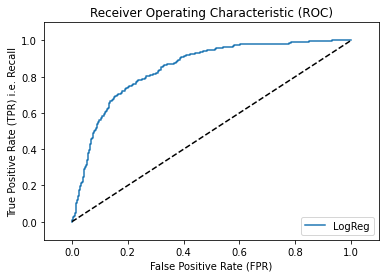

AUROC: 0.846990727356277


Results for: RandForest
[[1092    7]
 [  16  283]]
Accuracy: 0.9835479256080114
Precision: 0.9758620689655172
Recall: 0.9464882943143813
F1: 0.9609507640067911


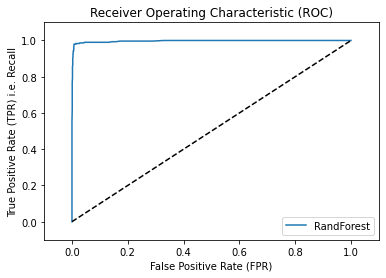

AUROC: 0.9968305026460662


Results for: GradBoost
[[1085   14]
 [  14  285]]
Accuracy: 0.9799713876967096
Precision: 0.9531772575250836
Recall: 0.9531772575250836
F1: 0.9531772575250836


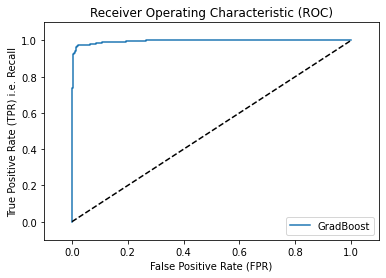

AUROC: 0.9954747550981281




In [80]:
from sklearn.metrics import roc_auc_score

for name, model in models.items():
    print('Results for:', name)
    
    # obtain predictions
    pred = models[name].predict(X_test)    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)    # accuracy score
    print('Accuracy:', accuracy_score(y_test, pred))
    
    # precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    # recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    # F1_score
    print('F1:', f1_score(y_test, pred))
    
    # obtain prediction probabilities
    pred = models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]    # plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, pred) 
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate (TPR) i.e. Recall')
    plt.xlabel('False Positive Rate (FPR)')
    plt.show()
    
    # AUROC score
    print('AUROC:', roc_auc_score(y_test, pred))
    print('\n')

<a name = Section93></a>

## **9.3 Model Evaluation on Unseen data**

In [81]:
Employee_Unseen = pd.read_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/Employee_Unseen.csv')

In [82]:
Employee_Unseen.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.000000,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.000000,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.000000,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.000000,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.000000,103297


In [83]:
Employee_Unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [84]:
Employee_Unseen[Employee_Unseen.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id


In [85]:
DF_PreProcessing(Employee_Unseen)

In [86]:
Employee_Unseen['department'].nunique()

11

In [88]:
Employee_Unseen['department'].sort_values().unique()

array(['Admin', 'Engineering', 'Finance', 'IT', 'Management', 'Marketing',
       'Procurement', 'Product', 'Sales', 'Support', 'UNKNOWN'],
      dtype=object)

In [89]:
Employee_Unseen[Employee_Unseen['department'] == '-IT'].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id


In [90]:
Employee_Unseen[Employee_Unseen['department'].isna()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id


In [91]:
Employee_Unseen[Employee_Unseen['department'] == 'Temp']

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id


In [92]:
Employee_Unseen['filed_complaint'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [93]:
Employee_Unseen['last_evaluation'].unique()

array([0.52884113, 0.78456091, 0.54518313, 0.        , 0.45463736,
       0.57076674, 0.67526307, 0.78231027, 0.39680098, 0.83430578,
       0.57041335, 0.90044624, 0.75024719, 0.94671497, 0.52645613,
       0.68156631, 0.91873655, 0.82979983, 0.98209475, 0.5632508 ,
       0.77458579, 0.72917756, 0.76919555, 0.96054116, 0.7856316 ,
       0.9873788 , 0.58159549, 0.96354989, 0.6676013 , 0.71350588,
       0.60355686, 0.92093681, 0.509507  , 0.92755769, 0.89141711,
       0.79370994, 0.74085962, 0.80571355, 0.80654338, 0.95394482,
       0.53152239, 0.96034944, 0.53841958, 0.94626425, 0.72796776,
       0.82032765, 0.62231022, 0.65576966, 0.91413956, 0.67112847,
       0.98541157, 0.49704695, 0.82022677, 0.97098686, 0.7442267 ,
       0.73385813, 0.82696815, 0.73952076, 1.        , 0.40895105,
       0.49000345, 0.67278883, 0.55674488, 0.98044384, 0.77675377,
       0.50832059, 0.902469  , 0.98100204, 0.53326609, 0.8452135 ,
       0.67203818, 0.69473796, 0.72596398, 0.82036753, 0.52406

In [94]:
Employee_Unseen['n_projects'].unique()

array([2, 4, 5, 3, 6, 7])

In [95]:
Employee_Unseen['recently_promoted'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [96]:
Employee_Unseen['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [97]:
Employee_Unseen['tenure'].unique()

<IntegerArray>
[3, 2, 5, 6, 4, 10, 7]
Length: 7, dtype: Int64

In [98]:
Employee_Unseen[Employee_Unseen['satisfaction'].isna()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id


In [99]:
Employee_Unseen.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,201.824742,0.134021,0.636716,3.824742,0.030928,0.629632,3.422680,112704.164948
std,50.887746,0.342444,0.306015,1.315059,0.174022,0.246901,1.566811,9501.769016
min,101.000000,0.000000,0.000000,2.000000,0.000000,0.051515,2.000000,100230.000000
25%,157.000000,0.000000,0.528841,3.000000,0.000000,0.477002,2.000000,106053.000000
50%,209.000000,0.000000,0.725964,4.000000,0.000000,0.660827,3.000000,110559.000000
75%,249.000000,0.000000,0.845213,5.000000,0.000000,0.832039,4.000000,117431.000000
max,289.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,145105.000000


In [100]:
Employee_Unseen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    97 non-null     int64  
 1   department         97 non-null     object 
 2   filed_complaint    97 non-null     Int64  
 3   last_evaluation    97 non-null     float64
 4   n_projects         97 non-null     int64  
 5   recently_promoted  97 non-null     Int64  
 6   salary             97 non-null     object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     Int64  
 9   employee_id        97 non-null     int64  
dtypes: Int64(3), float64(2), int64(3), object(2)
memory usage: 8.6+ KB


In [101]:
Employee_Unseen.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,IT,0,0.528841,2,0,low,0.400464,3,119045
1,221,Product,0,0.784561,2,0,low,0.759513,3,112223
2,156,Sales,0,0.545183,2,0,medium,0.336457,3,103924
3,133,Procurement,0,0.000000,4,0,medium,0.832039,2,105922
4,135,Sales,0,0.454637,2,0,low,0.320723,5,103297


In [102]:
Encoded_Employee_Unseen = pd.get_dummies(Employee_Unseen, columns = ['department', 'salary'], drop_first=True)
Encoded_Employee_Unseen.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,department_Engineering,department_Finance,department_IT,department_Management,department_Marketing,department_Procurement,department_Product,department_Sales,department_Support,department_UNKNOWN,salary_low,salary_medium
0,134,0,0.528841,2,0,0.400464,3,119045,0,0,1,0,0,0,0,0,0,0,1,0
1,221,0,0.784561,2,0,0.759513,3,112223,0,0,0,0,0,0,1,0,0,0,1,0
2,156,0,0.545183,2,0,0.336457,3,103924,0,0,0,0,0,0,0,1,0,0,0,1
3,133,0,0.000000,4,0,0.832039,2,105922,0,0,0,0,0,1,0,0,0,0,0,1
4,135,0,0.454637,2,0,0.320723,5,103297,0,0,0,0,0,0,0,1,0,0,1,0


In [103]:
X_Unseen = Encoded_Employee_Unseen.drop(['employee_id'], axis = 1)

In [104]:
from sklearn.metrics import roc_auc_score

for name, model in models.items():
    print('Results for:', name)
    
    # obtain predictions
    pred = models[name].predict(X_Unseen)    # confusion matrix

    print(pred)

    if(name == 'RandForest'):
      RandForest = models[name].predict(X_Unseen)

RandForest

Results for: LogReg
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Results for: RandForest
[1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
Results for: GradBoost
[1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
for name, model in models.items():
  if(name == 'RandForest'):
    print('Probability Prediction Results for:', name)
    
    pred_proba = models[name].predict_proba(X_Unseen)

pred_proba = pd.DataFrame(pred_proba)
pred_proba.columns = ['Employed', 'Left']
pred_proba

In [106]:
df_result = Encoded_Employee_Unseen.employee_id
df_result.reset_index(drop=True, inplace=True)

In [107]:
df_final_pred_result = pd.DataFrame(df_result).join(pd.DataFrame(RandForest)).join(pred_proba['Left'])

In [118]:
df_final_pred_result.head()

,employee_id,0,Left
0,119045,1,0.995000
1,112223,0,0.150000
2,103924,1,0.980000
3,105922,0,0.000000
4,103297,1,0.720000


In [108]:
df_final_pred_result.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_HR/Employee_Final_Pred_Result.csv')

---
<a name = Section10></a>
# **10. Summarization**
---

<a name = Section101></a>
### **10.1 Conclusion**



Based on 3 different Classification models (Logistic Regression, Random Forest & Gradient Boost), we have concluded that **Random Forest model** gave **98% accuracy**

<br>

**Training Dataset details**

  1. Train vs Test split - **90% vs 10%**
  2. Random state taken - **3225**
  3. Out of **1398 Test samples** in the actual data, below is how our model worked.

    a. **1375 correctly classified**

    b. **23 wrongly classified**

      True positive - 1092
      True Negative - 283
      False Negative - 16
      False positive - 7

<br>

**Unseen Dataset details**

  1. **Removed 3 Temporary employees**
  2. Out of 97 employees, we have applied the model and uploaded the prediction percentage as a .csv file.

    a. **67 employees are staying back**

    b. **30 employees will leave** the organization (1 in 3 employee is leaving)


<br>

**NOTE**: High Attrition identified.